0.37702298164367676
0.3009355068206787


<Figure size 432x288 with 0 Axes>

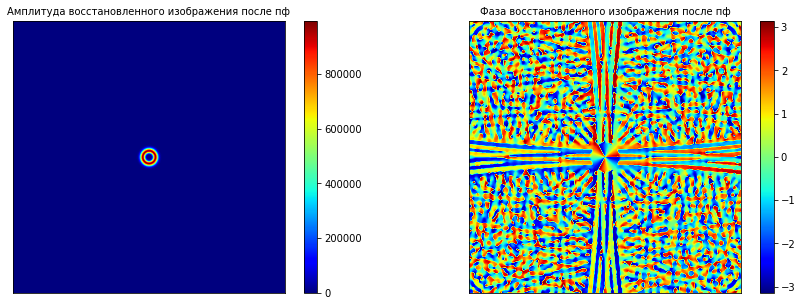

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy.special
from scipy.special import jv
import seaborn as sns
import time

def f(r):
    return np.exp(-r ** 2) * (r ** np.abs(p)) * L(n, np.abs(p), r)

def C(k, alfa):
  res =  0
  for i in range (k):
    res*=(alfa-i)
  return res/ (np.math.factorial(k))

def C_(k, alfa):
    return (np.math.factorial(alfa))/((np.math.factorial(alfa - k))*(np.math.factorial(k)))

def L(n, p, r):
    sum = 0
    for j in range(n+1):
      sum += (-1)**(j) * C_(n-j, n+p)*(r**(2*j)) / np.math.factorial(j)
    return sum

def GL(r):
    return np.exp(-r ** 2) * (r ** np.abs(p)) * L(n, p, r)

# БПФ одномерное
def bpf_1d(f, N, M, hx):
  f_ =np.zeros(N)
  # Дополним вектор f необходимым числом нулей до размерности M
  f_ = np.append(f[int(N//2):], np.zeros(M - N))
  # Разбить вектор f на две половины и поменять их местами.
  f_ = np.append(f_, f[:N // 2])
  # БПФ от f
  fft = np.fft.fft(f_, M)
  # умножить результат на шаг 
  fft = hx * fft
  # "Вырезать" центральную часть вектора F, оставив центральные N элементов.
  return np.append(fft[M - N // 2:], fft[:N // 2])

# двухмерное быстрое преобразование Фурье
def bpf_2d(f, N, M, hx):
  
  for i in range(N):
    # проход по строкам
    f[:, i] = bpf_1d(f[:, i], N, M, hx)
  for i in range(N):
    # проход по столбцам
    f[i, :] = bpf_1d(f[i, :], N, M, hx)
  return f

def rebuild2d(input_f):
    N = len(input_f)
    n = N - 1 # n - число элементов
    a = np.zeros((2 * N, 2 * N), dtype = 'complex')
    for j in range (2 * N):
        for k in range (2 * N):
            alfa = round(np.sqrt((j - n) ** 2 + (k - n) ** 2))
            if (alfa > n):
                a[j][k]=0
            else:
                a[j][k] = input_f[alfa] * np.exp(1j * m * np.arctan2(k - n, j - n))
    return a

# преобразование Ханкеля
def hankel_transform(r, f):
    N = len(f)
    integral = np.zeros(N, dtype='complex')
    for i, item in enumerate(r):
      #jv (v, z)	Bessel function of the first kind of real order and complex argument.
        integral[i] = np.sum(f * jv(m, 2* np.pi * r * item)* r * (R/N))
    return integral * (2 * np.pi / ((1j) ** m))


def plot_1d(headline, x, y):
    plt.plot(x, y)
    plt.title(headline)
    plt.grid()
    plt.show()

def plot_2d(field, label):  
  my_map = plt.get_cmap("jet")  
  plt.set_cmap(my_map)  
  plt.figure(figsize=(15, 5))
  
  plt.subplot(1, 2, 1)  
  plt.imshow(abs(field))  
  plt.title("Амплитуда " + label, fontsize=10)  
  plt.colorbar()
  plt.xticks([])  
  plt.yticks([])

  plt.subplot(1, 2, 2)
  plt.imshow(np.angle(field))
  plt.title("Фаза " + label, fontsize=10)
  plt.colorbar()
  plt.xticks([])
  plt.yticks([])
  plt.show()


if __name__ == '__main__':
    R = 5 
    m = -3
    n = 2 
    p = -3

    N = 512
    M = 4096
    
    r = np.linspace(0, R, N)
    
    ###########
    f = f(r)
    #plot_1d("Амплитуда моды Гаусса-Лагерра: ", r, np.abs(f))
    #plot_1d("Фаза моды Гаусса-Лагерра: ", r, np.angle(f))
    
    ###########
    rebuild_LG = rebuild2d(f)
    #plot_2d(rebuild_LG, "восстановленного изображения")

    ###########
    start = time.time()
    hankel = hankel_transform(r, f)
    end = time.time()
    print(str(end - start))
    #print(hankel)
    #plot_1d("Амплитуда моды Г-Л после преобразования Ханкеля: ", r, np.abs(hankel))
    #plot_1d("Фаза моды Г-Л после преобразования Ханкеля: ", r, np.angle(hankel))

    ###########
    rebuild_Hankel = rebuild2d(hankel)
    #plot_2d(rebuild_Hankel, "восстановленного изображения после преобразования Ханкеля")

    ###########
    start_ = time.time()
    fft2d = bpf_2d(rebuild_LG, 2*N, M, (2 * R) / n)
    end_ = time.time()
    print(str(end_ - start_))
    plot_2d(fft2d, "восстановленного изображения после пф")
